enter the number of variables: 20
Enter the initial population size: 10
Enter the minimum value of X: -100
Enter the maximum value of X: 100
Enter the max number of iterations: 300
[41922.00445896 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.99232318 32868.99232318 32868.99232318
 32868.99232318 32868.9923

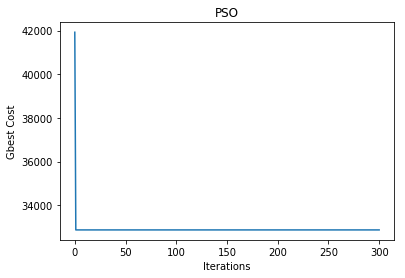

In [3]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
d=int(input("enter the number of variables: "))
N=int(input("Enter the initial population size: "))
xmin=float(input("Enter the minimum value of X: "))
xmax=float(input("Enter the maximum value of X: "))
iterations=int(input("Enter the max number of iterations: "))
def POP(d,N,xmin,xmax):
    return ((np.random.rand(N,d))*(2*xmax))-xmax
pop=POP(d,N,xmin,xmax)
#intial setup
import numpy as np
def cfun(a):
    return np.sum(a**2)

def GBEST(pbest):
    cost=np.apply_along_axis(cfun,1,pbest)
    gbestcost=np.argmin(cost)
    return np.array([pbest[gbestcost,:]])
def setup(pop):
    cost=np.apply_along_axis(cfun,1,pop)
    pbest=np.copy(pop)
    v=np.zeros((N,d))
    gbest= GBEST(pbest)
    GBests=np.zeros((iterations+1,d))
    GBests[0]=gbest
    return cost, pbest, v, gbest, GBests
cost, pbest, v, gbest, GBests= setup(pop)
#updating v,x,pbest,gbest
for x in range(0,iterations):
    for i in range(0,N):
        for j in range(0,d):
            v[i,j]+=(2*(np.random.rand())*(pbest[i,j]-pop[i,j]))+(2*(np.random.rand())*(gbest[0,j]-pop[i,j]))
            z=pop[i,j]+v[i,j]
            if z<=xmin:
                pop[i,j]=xmin
            elif z>=xmax:
                pop[i,j]=xmax
            else:
                pop[i,j]=z
        if cfun(pop[i])<cfun(pbest[i]):
            pbest[i]=pop[i]
    gbest= GBEST(pbest)
    GBests[x+1]=gbest
GBestscost=np.apply_along_axis(cfun,1,np.array(GBests))
print(GBestscost)
plt.plot(GBestscost)
plt.xlabel('Iterations')
plt.ylabel('Gbest Cost')
plt.title('PSO')
plt.show()